In [ ]:
# so in this problem actually the code ask the keras without tensorflow
# so maybe we can start from how can we process the data in only keras model?

In [1]:
import os 

base_dir = 'C:/Users/m477a/JupyterNote/task_prof_tsou/NEU Surface Defect Database/IMAGES'
data_dir = os.path.join(base_dir, 'train')

In [10]:
# import tensorflow as tf
# from tensorflow import keras 

# dataset = keras.preprocessing.image_dataset_from_directory(
#   data_dir, batch_size=64, image_size=(200, 200))

In [2]:
os.listdir(data_dir)

['crazing',
 'inclusion',
 'patches',
 'pitted_surface',
 'rolled-in_scale',
 'scratches']

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
     rescale = 1.255,
     rotation_range = 20,
     horizontal_flip = True,
     shear_range = 0.2,
     fill_mode = 'wrap') #,
#      validation_split = 0.1) # from the articel data is 1:9

## Splitting the data into Validation and Train

In [4]:
train_data = train_data_generator.flow_from_directory(
     data_dir,
     target_size=(224, 224),
     shuffle = True,
     batch_size=1770,
     class_mode = 'categorical'
#      subset = 'training'
)

# validation_data = train_data_generator.flow_from_directory(
#      data_dir,
#      target_size=(200,200),
#      subset = 'validation'
# )

Found 1770 images belonging to 6 classes.


In [5]:
print(type(train_data))

<class 'keras.preprocessing.image.DirectoryIterator'>


In [6]:
# the preprocessing before making a model
X_train, y_train = train_data.next() 
# also the code up there converting the data type from keras.preprocessing.image.DirectoryIterator into numpy.ndarray 
# question : do we need the X_test and y_test in this methode of model fitting??
# answer   : actually the fitting model already split the validation data to 0.1 

In [7]:
print(type(X_train))

<class 'numpy.ndarray'>


In [8]:
X_train.shape
# 1770 entries
# 224 widht
# 224 height
# 3 chanels which rgb

(1770, 224, 224, 3)

In [9]:
y_train.shape
# 1770 entries
# 6 classes

(1770, 6)

## InceptionV3

In [11]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# parameters for architecture
input_shape = (224, 224, 3)
num_classes = 6
conv_size = 32

# parameters for training
batch_size = 32
num_epochs = 20

# load InceptionV3 from Keras
InceptionV3_model = InceptionV3(include_top=False, input_shape=input_shape)

# add custom Layers
x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
Custom_Output = Dense(num_classes, activation='softmax')(x)

# define the input and output of the model
model = Model(inputs = InceptionV3_model.input, outputs = Custom_Output)
        
# compile the model
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

model.summary()

# train the model 
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_3[0][0]']               
 alization)                     )                                                             

50/50 [==============================] - 482s 9s/step - loss: 0.4940 - accuracy: 0.8456 - val_loss: 2761.0801 - val_accuracy: 0.1582
Epoch 2/20
50/50 [==============================] - 470s 9s/step - loss: 0.2138 - accuracy: 0.9404 - val_loss: 19.5896 - val_accuracy: 0.3107
Epoch 3/20
50/50 [==============================] - 475s 10s/step - loss: 0.1579 - accuracy: 0.9592 - val_loss: 25.9536 - val_accuracy: 0.3898
Epoch 4/20
50/50 [==============================] - 472s 9s/step - loss: 0.1250 - accuracy: 0.9636 - val_loss: 10.3317 - val_accuracy: 0.5480
Epoch 5/20
50/50 [==============================] - 470s 9s/step - loss: 0.1213 - accuracy: 0.9661 - val_loss: 31.4041 - val_accuracy: 0.4689
Epoch 6/20
50/50 [==============================] - 527s 11s/step - loss: 0.1660 - accuracy: 0.9548 - val_loss: 15.6846 - val_accuracy: 0.4576
Epoch 7/20
50/50 [==============================] - 509s 10s/step - loss: 0.2040 - accuracy: 0.9479 - val_loss: 132.2529 - val_accuracy: 0.2147
Epoch 8/20


## Sequential

In [16]:
# from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# parameters for architecture
input_shape = (224, 224, 3)
num_classes = 6
conv_size = 32

# parameters for training
batch_size = 32
num_epochs = 20

# build the model
model = Sequential()

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same', input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Conv2D(conv_size, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
 
# train the model                    
history1 = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.1)
# actually in this model already have model validation 0.1 
# so it's free for us to put the full dataset here

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_98 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 56, 56, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 28, 28, 32)      

## Mobilnet

In [12]:
from keras.applications.mobilenet import MobileNet
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# parameters for architecture
input_shape = (224, 224, 3)
num_classes = 6
conv_size = 32

# parameters for training
batch_size = 32
num_epochs = 20

# load MobileNet from Keras
MobileNet_model = MobileNet(include_top=False, input_shape=input_shape)

# add custom Layers
x = MobileNet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
Custom_Output = Dense(num_classes, activation='softmax')(x)

# define the input and output of the model
model = Model(inputs = MobileNet_model.input, outputs = Custom_Output)
        
# compile the model
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

model.summary()

# train the model 
history2 = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=0.1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

50/50 [==============================] - 222s 4s/step - loss: 0.2724 - accuracy: 0.9209 - val_loss: 4.4746 - val_accuracy: 0.6158
Epoch 2/20
50/50 [==============================] - 218s 4s/step - loss: 0.1226 - accuracy: 0.9749 - val_loss: 2.2387 - val_accuracy: 0.8588
Epoch 3/20
50/50 [==============================] - 216s 4s/step - loss: 0.1547 - accuracy: 0.9718 - val_loss: 19.1269 - val_accuracy: 0.3785
Epoch 4/20
50/50 [==============================] - 216s 4s/step - loss: 0.1464 - accuracy: 0.9661 - val_loss: 4.8735 - val_accuracy: 0.7458
Epoch 5/20
50/50 [==============================] - 215s 4s/step - loss: 0.0397 - accuracy: 0.9912 - val_loss: 0.3249 - val_accuracy: 0.9548
Epoch 6/20
50/50 [==============================] - 216s 4s/step - loss: 0.0514 - accuracy: 0.9862 - val_loss: 0.5373 - val_accuracy: 0.9322
Epoch 7/20
50/50 [==============================] - 218s 4s/step - loss: 0.0295 - accuracy: 0.9925 - val_loss: 0.4476 - val_accuracy: 0.9435
Epoch 8/20
50/50 [=====

## Eval InceptionV3

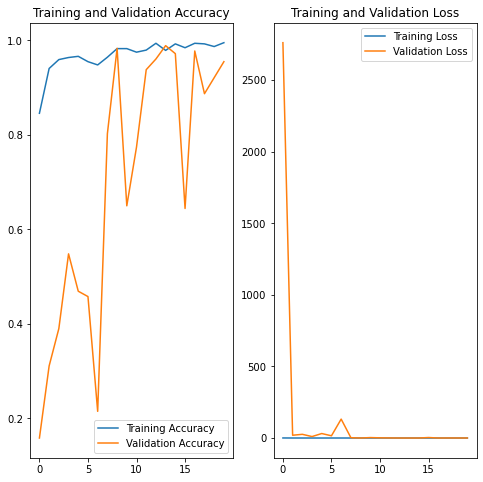

In [14]:
import matplotlib.pyplot as plt

epochs = 20

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss= history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1) # plt.subplot(1, 2, 2) will merge the result
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Eval Sequential

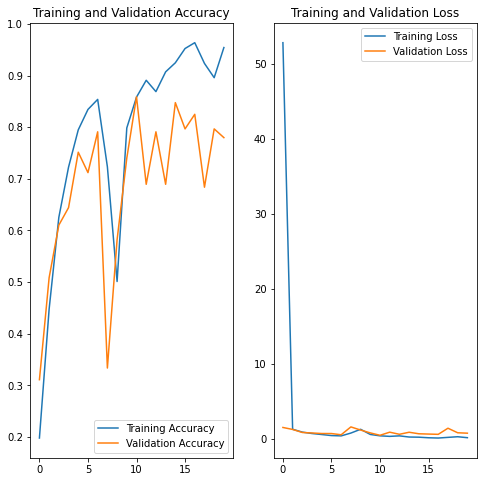

In [18]:
import matplotlib.pyplot as plt

epochs = 20

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss= history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1) # plt.subplot(1, 2, 2) will merge the result
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Eval MobileNet

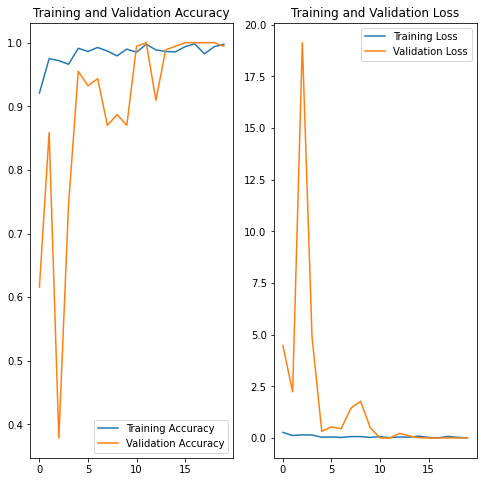

In [17]:
import matplotlib.pyplot as plt

epochs = 20

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss= history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1) # plt.subplot(1, 2, 2) will merge the result
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()